<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<br><br><br><br><br>
<h1>Neural Network with NumPy: Fashion-MNIST </h1>

> _by Team 11: Alexey Yushkin, Jack Daoud, Tetsuya Mano_
>
> _May 2<sup>nd</sup>, 2021_


<br><br><br><br>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<br><br>

**This notebook is a submission to the Neural Network Hackathon organized by the Hult Data Analytics club & Marcus Rabe (Apr 30th - May 2nd, 2021)**

- Data used is the Fashion MNIST found <a href='https://nnfs.io/datasets/fashion_mnist_images.zip'> here</a>.
- Model used is a Convolutional Neural Network built using the Numpy library

<br>

# 1. Setup

## 1.1 Packages

In [1]:
# Packages

import cv2                      # Computer vision library
import os                       # Operating system library
import urllib.request           # URL fetching library
import urllib 
import numpy as np              # Computational library
import pandas as pd             # Data analysis library
import time                     # Time library
import matplotlib.pyplot as plt # Visualization library
import seaborn as sns
from zipfile import ZipFile     # Zipfile library
from tqdm import tqdm           # Progress bar library

# Instantiate script start time
start_time = time.time()

## 1.2 Functions

In [2]:
# Functions

def download_minist_dataset():
    """
    Downloads and unzips the mnist dataset
    """
    URL = 'https://nnfs.io/datasets/fashion_mnist_images.zip'
    FILE = 'fashion_mnist_images.zip'
    FOLDER = 'fashion_mnist_images'
    if not os.path.isfile(FILE):
        print(f'Downloading {URL} and saving as {FILE}...')
        urllib.request.urlretrieve(URL, FILE)
    print('Unzipping images...')
    with ZipFile(FILE) as zip_images:
        zip_images.extractall(FOLDER)
    print('Done!')

def load_mnist_dataset(dataset, path):
    """
    Loads the mnist dataset
    """
    # Scan all the directories and create a list of labels
    labels = os.listdir(os.path.join(path, dataset))
    # Create lists for samples and labels
    X = []
    y = []
    # For each label folder
    for label in labels:
        # And for each image in given folder
        for file in os.listdir(os.path.join(path, dataset, label)):
            # Read the image
            image = cv2.imread(os.path.join(
                path, dataset, label, file), cv2.IMREAD_UNCHANGED)
            # And append it and a label to the lists
            X.append(image)
            y.append(label)
    # Convert the data to proper numpy arrays and return
    return np.array(X), np.array(y).astype('uint8')

def create_data_mnist(path): 
    """
    Creates the mnist dataset
    """
    # Load both sets separately
    X, y = load_mnist_dataset('train', path)
    X_test, y_test = load_mnist_dataset('test', path)
    # And return all the data
    return X, y, X_test, y_test

def ReLU(x):    
    """
    The rectified linear unit function
    """
    return np.maximum(0, x)

def normalize_array(array):
    """
    Normalize an array
    """
    normalized_array = array / np.linalg.norm(array)
    return normalized_array

## 1.4 Classes

In [3]:
# Classes

class TwoLayerNet(object):    
    """
    A two-layer fully-connected neural network. The net has an input dimension
    of N, a hidden layer dimension of H (i.e. number of neurons), and performs
    classification over C classes.
    
    We train the network with a softmax loss function and L2 regularization on
    the weight matrices. The network uses a ReLU nonlinearity after the first 
    fully connected layer.

    In other words, the network has the following architecture:

    Input -> fully connected layer - ReLU -> fully connected layer - softmax

    The outputs of the second fully-connected layer are the scores for each class.
    """

    def __init__(self, input_size, hidden_size, output_size, std=1e-4): 
        """
        Initialize the model. Weights are initialized to small random values and
        biases are initialized to zero. Weights and biases are stored in the
        variable self.params, which is a dictionary with the following keys:

        W1: First layer weights; has shape (D, H)This 
        b1: First layer biases; has shape (H,)
        W2: Second layer weights; has shape (H, C)
        b2: Second layer biases; has shape (C,)

        Inputs:
        - input_size: The dimension D of the input data.
        - hidden_size: The number of neurons H in the hidden layer.
        - output_size: The number of classes C.
        """
        self.params = {}    
        self.params['W1'] = std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros((1, hidden_size))
        self.params['W2'] = std * np.random.randn(hidden_size, output_size) 
        self.params['b2'] = np.zeros((1, output_size))

    def loss(self, X, y=None, reg=0.0):
        """
        Compute the loss and gradients for a two layer fully connected neural
        network.

        Inputs:
        - X: Input data of shape (N, D). Each X[i] is a training sample.
        - y: Vector of training labels. y[i] is the label for X[i], and each y[i] is
          an integer in the range 0 <= y[i] < C. This parameter is optional; if it
          is not passed then we only return scores, and if it is passed then we
          instead return the loss and gradients.
        - reg: Regularization strength.

        Returns:
        If y is None, return a matrix scores of shape (N, C) where scores[i, c] is
        the score for class c on input X[i].

        If y is not None, instead return a tuple of:
        - loss: Loss (data loss and regularization loss) for this batch of training
          samples.
        - grads: Dictionary mapping parameter names to gradients of those parameters
          with respect to the loss function; has the same keys as self.params.
        """
        # Unpack variables from the params dictionary
        W1, b1 = self.params['W1'], self.params['b1']
        W2, b2 = self.params['W2'], self.params['b2']
        N, D = X.shape
        
        # Compute the forward pass
        scores = None
        h1 = ReLU(np.dot(X, W1) + b1)  
        out = np.dot(h1, W2) + b2          
        scores = out
        
        # If the targets are not given then jump out, we're done
        if y is None:   
            return scores
        
        # Compute the loss
        scores_max = np.max(scores, axis=1, keepdims=True)    
        exp_scores = np.exp(scores - scores_max)              
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)    
        correct_logprobs = -np.log(probs[range(N), y])        
        data_loss = np.sum(correct_logprobs) / N
        reg_loss = 0.5 * reg * np.sum(W1 * W1) + 0.5 * reg * np.sum(W2 * W2)
        loss = data_loss + reg_loss
        
        # Backward pass: compute gradients
        grads = {}
        dscores = probs                                 
        dscores[range(N), y] -= 1
        dscores /= N
        dW2 = np.dot(h1.T, dscores)                     
        db2 = np.sum(dscores, axis=0, keepdims=True)    
        dh1 = np.dot(dscores, W2.T)                     
        dh1[h1 <= 0] = 0
        dW1 = np.dot(X.T, dh1)                          
        db1 = np.sum(dh1, axis=0, keepdims=True)
        dW2 += reg * W2
        dW1 += reg * W1
        
        grads['W1'] = dW1
        grads['b1'] = db1
        grads['W2'] = dW2
        grads['b2'] = db2

        return loss, grads

    def train(self, X, y, X_test, y_test, learning_rate=1e-3, 
              learning_rate_decay=0.95, reg=1e-5, mu=0.9, num_epochs=10, 
              mu_increase=1.0, batch_size=200, verbose=False):   
        """
        Train this neural network using stochastic gradient descent.

        Inputs:
        - X: A numpy array of shape (N, D) giving training data.
        - y: A numpy array f shape (N,) giving training labels; y[i] = c means that
          X[i] has label c, where 0 <= c < C.
        - X_test: A numpy array of shape (N_test, D) giving test data.
        - y_test: A numpy array of shape (N_test,) giving test labels.
        - learning_rate: Scalar giving learning rate for optimization.
        - learning_rate_decay: Scalar giving factor used to decay the learning rate
          after each epoch.
        - reg: Scalar giving regularization strength.
        - num_iters: Number of steps to take when optimizing.
        - batch_size: Number of training examples to use per step.
        - verbose: boolean; if true print progress during optimization.
        """
        num_train = X.shape[0]
        iterations_per_epoch = max(int(num_train / batch_size), 1)
        
        # Use SGD to optimize the parameters in self.model
        v_W2, v_b2 = 0.0, 0.0
        v_W1, v_b1 = 0.0, 0.0
        loss_history = []
        train_acc_history = []
        test_acc_history = []

        for it in tqdm(range(1, num_epochs * iterations_per_epoch + 1)):
            X_batch = None   
            y_batch = None 
            
            # Create a random minibatch of training data and labels
            sample_index = np.random.choice(num_train, batch_size, replace=True)   
            X_batch = X[sample_index, :]          
            y_batch = y[sample_index]             
            
            # Compute loss and gradients using the current minibatch
            loss, grads = self.loss(X_batch, y=y_batch, reg=reg) 
            loss_history.append(loss)
            
            # Use the gradients to update the parameters of the network
            v_W2 = mu * v_W2 - learning_rate * grads['W2']    
            self.params['W2'] += v_W2   
            v_b2 = mu * v_b2 - learning_rate * grads['b2']    
            self.params['b2'] += v_b2   
            v_W1 = mu * v_W1 - learning_rate * grads['W1']    
            self.params['W1'] += v_W1   
            v_b1 = mu * v_b1 - learning_rate * grads['b1']  
            self.params['b1'] += v_b1
            
            if verbose and it % iterations_per_epoch == 0:    
            # Every epoch, check train and test accuracy and decay learning rate.
                epoch = it / iterations_per_epoch    
                train_acc = (self.predict(X_batch) == y_batch).mean()    
                test_acc = (self.predict(X_test) == y_test).mean()    
                train_acc_history.append(train_acc)    
                test_acc_history.append(test_acc)    
#                 print(f"""
# Epoch {int(epoch)}/{num_epochs} -> Loss: {round(loss,4)}, Train Accuracy: {round(train_acc,4)}, Test Accuracy: {test_acc}
# """)
                
                # Decay learning rate
                learning_rate *= learning_rate_decay    
                mu *= mu_increase
        
        # Save results 
        return {   
            'loss_history': loss_history,   
            'train_acc_history': train_acc_history,   
            'test_acc_history': test_acc_history,
        }

    def predict(self, X):    
        """
        Use the trained weights of this two-layer network to predict labels for
        data points. For each data point we predict scores for each of the C
        classes, and assign each data point to the class with the highest score.

        Inputs:
        - X: A numpy array of shape (N, D) giving N D-dimensional data points to
          classify.

        Returns:
        - y_pred: A numpy array of shape (N,) giving predicted labels for each of
        the elements of X. For all i, y_pred[i] = c means that X[i] is predicted
        to have class c, where 0 <= c < C.
        """
        y_pred = None    
        h1 = ReLU(np.dot(X, self.params['W1']) + self.params['b1']) 
        scores = np.dot(h1, self.params['W2']) + self.params['b2']    
        y_pred = np.argmax(scores, axis=1)    

        return y_pred

# 2. Analysis

## 2.1 Data Exploration

- Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total.
- Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255.
- Each class has the same number of observations (6,000 per class) and therefore there is no class imbalance.

In [4]:
# Import Data & Explore

# Download data (uncomment if data is not found in directory)
#download_minist_dataset()

# Split data into training & testing
X_train, y_train, X_test, y_test = create_data_mnist('fashion_mnist_images')

# Organize train data into a DataFrame for visualization / manipulation
df_train = pd.DataFrame({'pixels':list(X_train.reshape(60000, 784)), 
                         'labels':y_train}, columns=['pixels', 'labels'])

# Print dimensions of data
print(f"""
Train Dimensions: 
-----------------
- Observations: {X_train.shape[0]}
- Pixels per picture: ({X_train.shape[1]}, {X_train.shape[2]}) or {X_train.shape[1]*X_train.shape[2]} in total
- Pixel value range: {np.min(X_train[0])} - {np.max(X_train[0])}


Test Dimensions:
-----------------
- Observations: {X_test.shape[0]}
""")


Train Dimensions: 
-----------------
- Observations: 60000
- Pixels per picture: (28, 28) or 784 in total
- Pixel value range: 0 - 255


Test Dimensions:
-----------------
- Observations: 10000



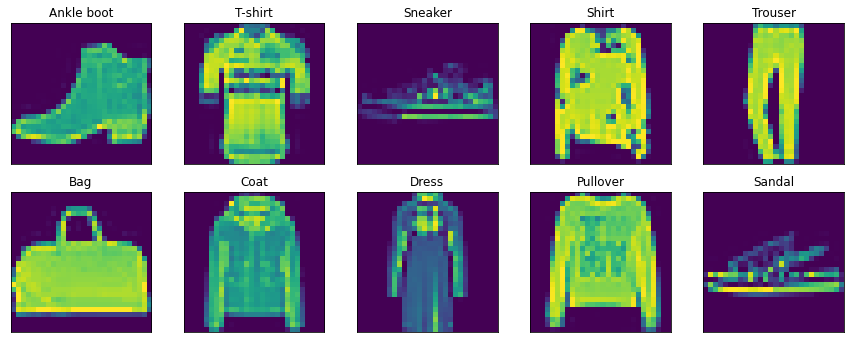

In [5]:
# Display an example of each fashion item (i.e. each class)

# Create new dataframe of 1 item from each class
fashion_items = pd.DataFrame()

# Loop over each fashion item by index (every 6000 is a new item)
for x in np.arange(1, 60000, 6000):
    fashion_items = fashion_items.append(df_train.iloc[x,:])
    
# Create a list of item/class names
class_names = [
    'T-shirt', 
    'Trouser', 
    'Pullover', 
    'Dress', 
    'Coat', 
    'Sandal', 
    'Shirt', 
    'Sneaker',
    'Bag', 
    'Ankle boot']
    
#######################
# Plot all 10 classes #
#######################

# Set figure size
plt.figure(figsize=(15, 15))

# Loop over each fashion item / class
for i in range(10):
    
    # Instantiate subplot dimensions and locations
    plt.subplot(5, 5, i + 1)
    plt.xticks([])                                         # Remove tickmarks
    plt.yticks([])  
    plt.grid(False)                                        # Remove grid
    plt.imshow(fashion_items.iloc[i, 1].reshape((28,28)))  # Display picture
    label_index = int(fashion_items.iloc[i, 0])            # Pull label index
    plt.title(class_names[label_index])                    # Name each item

plt.show()

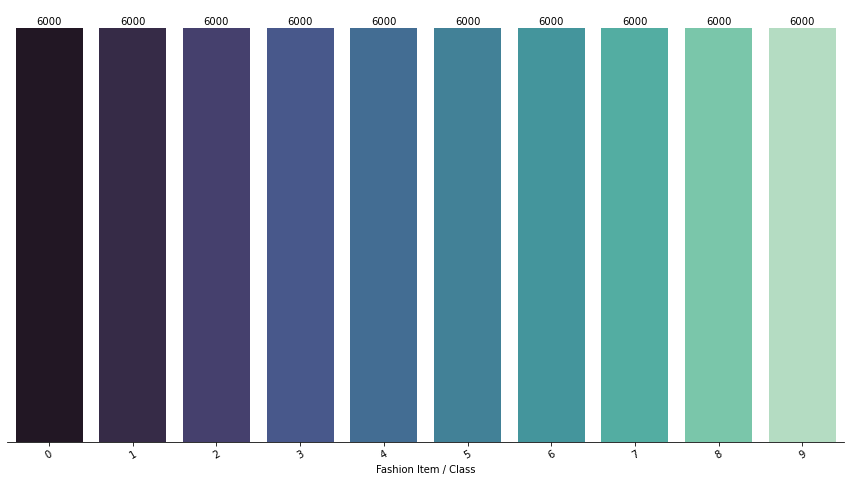

In [6]:
# Check for any class imbalance

# Set figure size
fig, ax = plt.subplots(figsize=[15, 8])

# Plot countplot for each class
splot = sns.countplot(data=df_train.sort_values(by='labels', ascending=False),
                    x='labels',
                    orient='v',
                    palette='mako')

# Place count values on top of bars
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center',
                   va='center',
                   xytext=(0, 6),
                   textcoords='offset points')

# Labels and formatting
plt.xlabel(xlabel='Fashion Item / Class')
plt.xticks(rotation=30)
splot.spines['right'].set_visible(False)
splot.spines['top'].set_visible(False)
splot.spines['left'].set_visible(False)
splot.axes.yaxis.set_visible(False)

## 2.2 Neural Network

In [7]:
# Instantiate, Train, and Test NN Model

# Set Random Seed
np.random.seed(2305)

# Reshape data to rows
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Instantiate parameters for Neural Network
input_size  = X_train.shape[1]
num_classes = 10
num_neurons = 304

# Model Start time
model_start_time = time.time()

# Instantiate neural network
net = TwoLayerNet(input_size, num_neurons, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_test, y_test,
                    num_epochs          = 70, 
                    batch_size          = 734, 
                    learning_rate       = 0.0008, 
                    learning_rate_decay = 0.98,
                    reg                 = 0.1, 
                    verbose             = True)


# Predict on the test data
test_acc = (net.predict(X_test) == y_test).mean()


# Model End time
model_end_time = time.time()

# Print Model parameters & accuracy
print(f"""
Test Accuracy: {test_acc}

Model Run Time: {round(model_end_time - model_start_time, 0)} seconds""")

100%|██████████| 5670/5670 [01:29<00:00, 63.07it/s]


Test Accuracy: 0.8917

Model Run Time: 90.0 seconds


# 3. Results

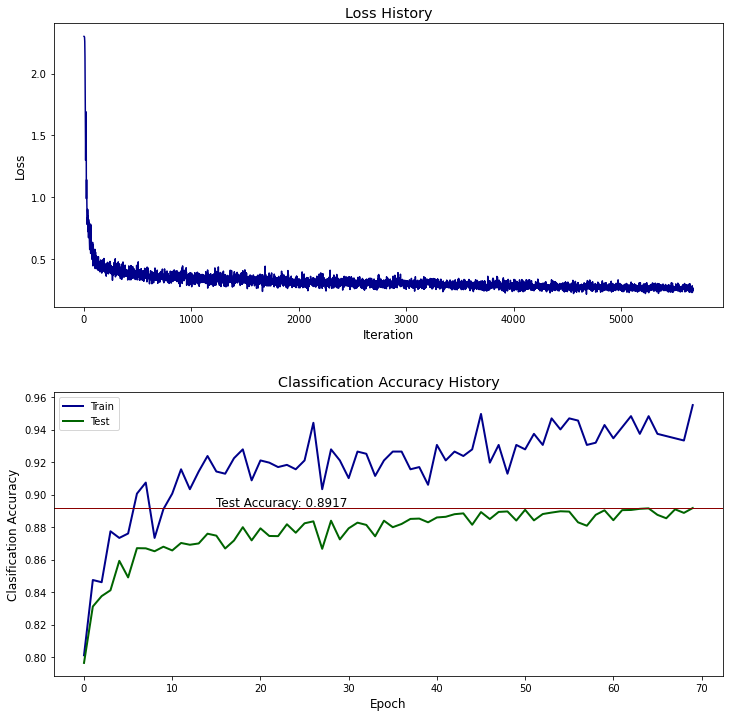

In [8]:
# Plot Neural Network model Results
%matplotlib inline

# Set figure size
fig, ax = plt.subplots(figsize=[12, 12])
plt.subplots_adjust(wspace =0, hspace =0.3) # Adjust spacing between subplots

##########################
# Plot the loss function #
##########################

# Subplot location
plt.subplot(2, 1, 1)

# Plot loss history
plt.plot(stats['loss_history'], color='darkblue')

# Labels & titles
plt.title('Loss History', fontsize='x-large')
plt.xlabel('Iteration', fontsize='large')
plt.ylabel('Loss', fontsize='large')

####################################
# Plot the train / test accuracies #
####################################

# Subplot location
plt.subplot(2, 1, 2)

# Plot training accuracy
plt.plot(stats['train_acc_history'], label = 'Train', color = 'darkblue',
         linewidth = 2)

# Plot testing accuracy
plt.plot(stats['test_acc_history'], label = 'Test', color = 'darkgreen',
         linewidth = 2)

# Labels & titles
plt.title('Classification Accuracy History', fontsize='x-large')
plt.xlabel('Epoch', fontsize='large')
plt.ylabel('Clasification Accuracy', fontsize = 'large')
plt.axhline(y = test_acc, color = 'darkred', linewidth = 1)
plt.text(x = 15, y = test_acc+0.001, s = f"Test Accuracy: {test_acc}",
        fontsize = 'large', horizontalalignment = 'left')                
plt.legend()

# Show plot
plt.show()

In [9]:
# Instantiate script end time
end_time = time.time()

# Print total script run time
print(f"Script running time is {round(end_time - start_time, 0)} s")

Script running time is 95.0 s


# Appendix

## Articles

> Adhokshaja, P. (May, 2020). <em><a href=https://medium.com/swlh/estimating-the-fashion-mnist-using-simple-neural-network-fa867918c227>Estimating the Fashion MNIST using simple neural network</a></em>. Start it up.
>
> Mendels, G. (August, 2019). <em><a href=https://towardsdatascience.com/selecting-the-right-weight-initialization-for-your-deep-neural-network-8ccf8dfcfc4c>Selecting the right weight initialization for your deep neural network</a></em>. Towards Data Science.
> 
> Morrow, C. (November, 2020). <em><a href=https://towardsdatascience.com/normalization-techniques-in-python-using-numpy-b998aa81d754>Normalization Techniques in Python using NumP</a></em>. Towards Data Science.
>
> Skalski, P. (October, 2018). <em><a href=https://towardsdatascience.com/lets-code-a-neural-network-in-plain-numpy-ae7e74410795>Let's code a Neural Network in plain NumPy</a></em>. Towards Data Science.
>
> Skalski, P. (August, 2018). <em><a href=https://towardsdatascience.com/https-medium-com-piotr-skalski92-deep-dive-into-deep-networks-math-17660bc376ba>Deep Dive into Math Behind Deep Networks</a></em>. Towards Data Science.  
> 
> Sharma, S. (September, 2017). <em><a href=https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6>Activation Functions in Neural Networks</a></em>. Towards Data Science.
>
> Sharma, S. (September, 2017). <em><a href=https://towardsdatascience.com/epoch-vs-iterations-vs-batch-size-4dfb9c7ce9c9>Epoch vs Batch Size vs Iterations</a></em>. Towards Data Science.
>
> Sethi, V. (December, 2019). <em><a href=https://towardsdatascience.com/types-of-neural-network-and-what-each-one-does-explained-d9b4c0ed63a1>Types of Neural Networks (and what each one does!) Explained</a></em>. Towards Data Science.

## Code

> <a href=https://www.kaggle.com/soham1024/basic-neural-network-from-scratch-in-python>Basic Neural Network from Scratch in Python</a>. Kaggle
>
> <a href=https://www.kaggle.com/accepteddoge/fashion-mnist-with-numpy-neural-networks>Fashion-MNIST with Numpy Neural Networks</a>. Kaggle
> 
> <a href=https://www.kaggle.com/pavansanagapati/a-simple-cnn-model-beginner-guide>A Simple CNN Model Beginner Guide</a>. Kaggle
>
> <a href=https://www.kaggle.com/scaomath/simple-mnist-numpy-from-scratch>Simple MNIST numpy from scratch</a>. Kaggle
>
> <a href=https://mlnotebook.github.io/post/nn-in-python/>A Simple Neural Network - With Numpy in Python</a>. Github.